In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [63]:
ls

Logistic Regression - Assignment.ipynb  Problem-Statement(Bank_data) (1).txt
Logistic Regression 1.ipynb             bank-full (1).csv


In [64]:
# Read the csv file  :  bank-full(1).csv
df_pre = pd.read_csv("bank-full (1).csv")

In [65]:
# Displaying the first 5 entries in the dataset
df_pre.head(5)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [66]:
# Number of Rows and Columns in the dataset
df_pre.shape

(45211, 1)

In [67]:
# Reading the columns in the dataset
df_pre.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [68]:
# Creating Columns for the new dataset
df = pd.DataFrame( columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y'])

In [69]:
# Reading all the rows from the unprocessed dataset, splitting at the ';', and making into a list. The list is then indexed to the new dataset
for i in range(0,45211):
    a1 = df_pre.iloc[i,0]
    l1 = a1.split(";")
    df.loc[len(df)]=l1

In [70]:
# Our new dataset is df
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


<AxesSubplot:>

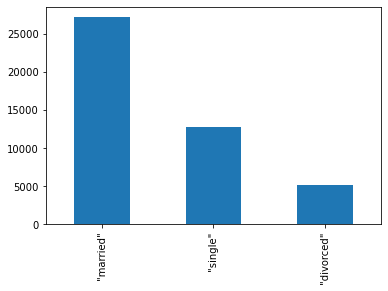

In [71]:
# Marital Status
df.marital.value_counts().plot(kind='bar')

<AxesSubplot:>

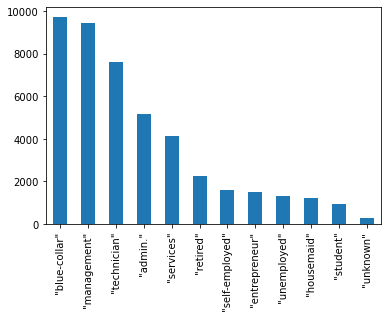

In [72]:
# Jobs
df.job.value_counts().plot(kind='bar')

<AxesSubplot:>

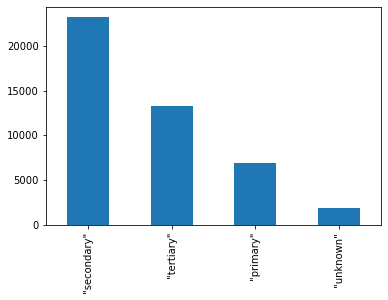

In [73]:
# Education Status
df.education.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='housing'>

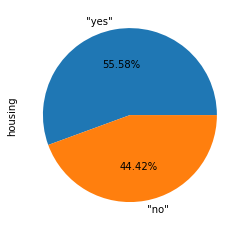

In [74]:
# Pie Chart for people in the Housing
plt.figure(figsize=(10,4))
df["housing"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:ylabel='loan'>

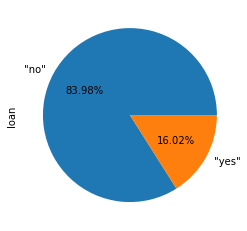

In [75]:
# Pie Chart for people who have taken loans
plt.figure(figsize=(10,4))
df["loan"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

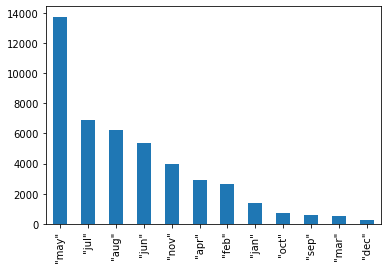

In [76]:
df.month.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='job'>

<Figure size 864x432 with 0 Axes>

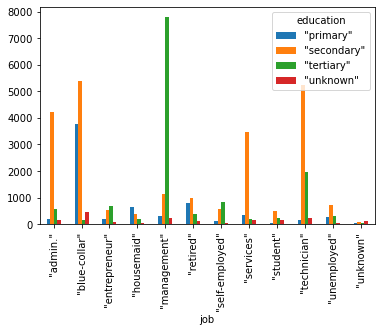

In [77]:
# Graph representing people based upon their Education and their Profession
plt.figure(figsize=(12,6))
pd.crosstab(df.job, df.education).plot(kind="bar")


In [78]:
Y = df.iloc[:,-1]
Y

0         "no"
1         "no"
2         "no"
3         "no"
4         "no"
         ...  
45206    "yes"
45207    "yes"
45208    "yes"
45209     "no"
45210     "no"
Name: y, Length: 45211, dtype: object

In [79]:
# The features are sliced from the dataframe
X = df.iloc[:,0:-1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown"""


In [80]:
X.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown"""


In [81]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [82]:
# Removing some unwanted columns like date, month and so on, which doesnt make any sense to the prediction.
# Creating Dummy variables for categorical data using One Hot Encoding
drop_col = ['campaign','pdays','previous','day','month']
X.drop(columns = drop_col, inplace = True)
new = pd.get_dummies(X, columns = ['job','marital','education','default','housing','loan','contact','poutcome'])



In [83]:
X = new

In [84]:
X

,age,balance,duration,"job_""admin.""","job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""",...,"housing_""yes""","loan_""no""","loan_""yes""","contact_""cellular""","contact_""telephone""","contact_""unknown""","poutcome_""failure""","poutcome_""other""","poutcome_""success""","poutcome_""unknown"""
0,58,2143,261,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,29,151,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,76,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,1506,92,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,1,198,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45207,71,1729,456,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
45208,72,5715,1127,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
45209,57,668,508,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [85]:
Y

0         "no"
1         "no"
2         "no"
3         "no"
4         "no"
         ...  
45206    "yes"
45207    "yes"
45208    "yes"
45209     "no"
45210     "no"
Name: y, Length: 45211, dtype: object

In [86]:
# converting the 'y'into 1's and 0's
Y1 = list(Y)
for i in range(0,45211):
    if Y1[i] == '"no"':
        Y1[i] = 0
    else:
        Y1[i] = 1

In [87]:
# A Logistic Regression Model is created in the name of 'regression1' 
regression1 = LogisticRegression()

In [88]:
# Features and the Outcome are fitted into the Model
regression1.fit(X,Y1)

/Users/atulat/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# Predicting with the features
Y1_ = regression1.predict(X)

In [90]:
# Converting the Predicted array into a Series
Y1_ = pd.Series(Y1_)

In [91]:
Y1_

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    0
45210    0
Length: 45211, dtype: int64

In [92]:
# Accuracy between the Actual Value and the Predicted Value
ac(Y1,Y1_)

0.9002455154718985

In [93]:
pred_diff= pd.DataFrame({'actual': Y1,
                         'predicted_values': regression1.predict(X)})

In [94]:
# Actual values and their predicted values in a dataframe
pred_diff

,actual,predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [95]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y1,Y1_))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.89     45211



In [96]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y1,Y1_)
print (confusion_matrix)

[[38995   927]
 [ 3583  1706]]


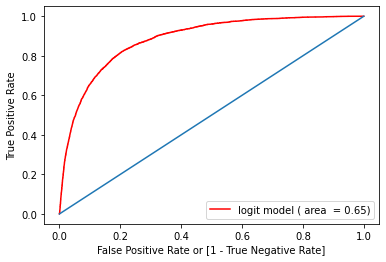

In [97]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y1, regression.predict_proba (X)[:,1])
auc = roc_auc_score(Y1, Y1_)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [98]:
# AUC Score
auc

0.6496679846365946